<a href="https://colab.research.google.com/github/Masoomas98/DSPS_MSarfraz/blob/main/Homework3/Homework_03_KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Kolmogorov Smirnoff test, application to earthquake data

In [1]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline


Populating the interactive namespace from numpy and matplotlib


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


The datasets came from the same population/ distribution. So basically they are the samples of the same population.



    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


the maximum difference in absolute value between the rescaled cummulative distribution of two datasets:

d_kl = max ∀_x |P_k(x) - P_l(x)|


    3 What does the probability distribution of this statistic depend on?
    
   


It depends on the large number of data N in each of the sets. N_e which is the effective number of data points.
    

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/MLPNS2021/tree/main/HW2_NHRT takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [2]:
import pandas as pd
#file = pd.read_csv('Earthquakes_MSarfraz-2.txt', sep=' ')
#saving it to google drive as the file is too large to display and it's a pain saving and uploading again and again.
file=pd.read_csv('https://raw.githubusercontent.com/Masoomas98/DSPS_MSarfraz/main/Homeworks/Homework3/Earthquakes_MSarfraz.txt', sep=' ')

In [3]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount = True)
#file = pd.read_csv('/content/drive/MyDrive/Earthquakes_MSarfraz.txt', sep =' ') #skippinginitial. to get rid of NaN
#from google.colab import drive
#drive.mount('/content/drive')

running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [4]:
file.shape

(77955, 34)

In [5]:
file.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,13:50:47.62,eq,NaN,l,2.25,c,NaN,NaN,35.944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
file.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,77955.000000,0.0,0.0,77955.000000,77955.000000,0.0,16801.000000,1.407500e+04,4.648500e+04,...,3395.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.423602,NaN,NaN,34.043113,-116.879284,NaN,7.340063,5.450496e+06,4.466906e+06,...,43.406480,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.411654,NaN,NaN,1.142951,1.052388,NaN,7.291527,3.797768e+06,3.134679e+06,...,24.256201,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.760000,NaN,-2.100000,1.000432e+06,1.070000e+02,...,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.130000,NaN,NaN,33.189000,-117.656000,NaN,-0.600000,3.042990e+06,3.025876e+06,...,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.310000,NaN,NaN,34.121000,-116.587000,NaN,10.600000,3.158833e+06,3.109078e+06,...,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.600000,NaN,NaN,34.617000,-116.273000,NaN,13.300000,9.110969e+06,9.026143e+06,...,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.300000,NaN,NaN,37.985500,-113.719000,NaN,29.300000,3.736673e+07,9.875241e+06,...,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [7]:
dataset = file[['#YYY/MM/DD', 'HH:mm:SS.ss','Unnamed: 5']].copy()
dataset.head()

,#YYY/MM/DD,HH:mm:SS.ss,Unnamed: 5
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,13:50:47.62,2.25


In [8]:
dataset.rename({"#YYY/MM/DD":"date","HH:mm:SS.ss":"time","Unnamed: 5":"mag"}, axis=1, inplace = True)
dataset.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,13:50:47.62,2.25


In [9]:
dataset['date']

0        1984/01/01
1        1984/01/01
2        1984/01/01
3        1984/01/01
4        1984/01/01
            ...    
77950    2002/12/31
77951    2002/12/31
77952    2002/12/31
77953    2002/12/31
77954    2002/12/31
Name: date, Length: 77955, dtype: object

Alternate way to name the columns as date, time and magnitude

In [10]:
#dataset.columns = ["date","time","mag"]
dataset.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,13:50:47.62,2.25


In [11]:
dataset.describe()

,mag
count,77955.000000
mean,2.423602
std,0.411654
min,2.000000
25%,2.130000
50%,2.310000
75%,2.600000
max,7.300000


In [12]:
pd.to_datetime(dataset.iloc[0]["date"] +" "+dataset.iloc[0]["time"])

Timestamp('1984-01-01 01:30:57.520000')

Difference of dataset.iloc to get time inteval between two consecutuve earthquakes.


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [13]:
dataset.time.dtype, dataset.time.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [14]:
dataset['datetime'] = pd.to_datetime(dataset['date']+' '+dataset['time'])
dataset = dataset.drop(['date','time'], axis=1)

In [15]:
dataset.head()

,mag,datetime
0,2.02,1984-01-01 01:30:57.520
1,2.12,1984-01-01 05:31:34.160
2,2.43,1984-01-01 06:59:05.140
3,2.07,1984-01-01 11:10:25.290
4,2.25,1984-01-01 13:50:47.620


## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [16]:

# first I create the timetamps pairs for the beginning and end of the valid periods.
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

############
#ss = []

#convert fraction years into days and months
import datetime

# Define the fractional year
fractional_year = [1984, 1986.5, 1990.3, 1992.1, 1994.6, 1995.6, 1996.1,1996.5, 1997,1997.6, 1997.75,1998.15, 1998.25,1999.35, 2000.55,2000.8,2000.9 ,2001.25,
                   2001.6 , 2002, 2002.5, 2003]
year =[]
months=[]
Days=[]
# Split the fractional part into months and days
for i in range(len(fractional_year)):
  integer_year = int(fractional_year[i])
  year.append(integer_year)
  fractional_part = fractional_year[i] - integer_year
  # Calculate the number of days in the fractional part of a year
  days_in_year = 365.25  # Assuming a non-leap year for simplicity
  days = int(fractional_part * days_in_year)
  # Use timedelta to add the days to January 1st of the integer year
  start_date = datetime.datetime(integer_year, 1, 1)
  result_date = start_date + datetime.timedelta(days=days)
  # Extract the month and day from the result date
  month = result_date.strftime('%B')
  day = result_date.day
  months.append(month)
  Days.append(day)
  # Print the result
  print(f"Year: {integer_year}, Month: {month}, Day: {day}")
print(months)





Year: 1984, Month: January, Day: 1
Year: 1986, Month: July, Day: 2
Year: 1990, Month: April, Day: 20
Year: 1992, Month: February, Day: 6
Year: 1994, Month: August, Day: 8
Year: 1995, Month: August, Day: 8
Year: 1996, Month: February, Day: 6
Year: 1996, Month: July, Day: 1
Year: 1997, Month: January, Day: 1
Year: 1997, Month: August, Day: 8
Year: 1997, Month: October, Day: 1
Year: 1998, Month: February, Day: 24
Year: 1998, Month: April, Day: 2
Year: 1999, Month: May, Day: 8
Year: 2000, Month: July, Day: 19
Year: 2000, Month: October, Day: 19
Year: 2000, Month: November, Day: 24
Year: 2001, Month: April, Day: 2
Year: 2001, Month: August, Day: 8
Year: 2002, Month: January, Day: 1
Year: 2002, Month: July, Day: 2
Year: 2003, Month: January, Day: 1
['January', 'July', 'April', 'February', 'August', 'August', 'February', 'July', 'January', 'August', 'October', 'February', 'April', 'May', 'July', 'October', 'November', 'April', 'August', 'January', 'July', 'January']


In [17]:
# Define a dictionary to map month names to numbers
month_name_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

#list of month names
month_names = ['January', 'July', 'April', 'February', 'August', 'August', 'February', 'July', 'January', 'August', 'October', 'February', 'April', 'May', 'July', 'October', 'November', 'April', 'August', 'January', 'July', 'January']

# Convert the month names to numbers using the dictionary
month_numbers = [month_name_to_number[name] for name in month_names]

# Display the month numbers
print(month_numbers)




[1, 7, 4, 2, 8, 8, 2, 7, 1, 8, 10, 2, 4, 5, 7, 10, 11, 4, 8, 1, 7, 1]


In [18]:
# formatting the dates {yyyy-mm-dd}
# Create a DataFrame
date_data = {'Year': year, 'Month': month_numbers, 'Day': Days}
df = pd.DataFrame(date_data)

# Combine year, month, and day columns into a single 'Date' column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the separate year, month, and day columns if needed
df = df.drop(columns=['Year', 'Month', 'Day'])

# Display the resulting DataFrame
print(df)


         Date
0  1984-01-01
1  1986-07-02
2  1990-04-20
3  1992-02-06
4  1994-08-08
5  1995-08-08
6  1996-02-06
7  1996-07-01
8  1997-01-01
9  1997-08-08
10 1997-10-01
11 1998-02-24
12 1998-04-02
13 1999-05-08
14 2000-07-19
15 2000-10-19
16 2000-11-24
17 2001-04-02
18 2001-08-08
19 2002-01-01
20 2002-07-02
21 2003-01-01


In [19]:
# making start and end dates in a single array to simplify the loop later on for extracting data

data = {
    'Date': [
        '1984-01-01', '1986-07-02', '1990-04-20', '1992-02-06', '1994-08-08', '1995-08-08',
        '1996-02-06', '1996-07-01', '1997-01-01', '1997-08-08', '1997-10-01', '1998-02-24',
        '1998-04-02', '1999-05-08', '2000-07-19', '2000-10-19', '2000-11-24', '2001-04-02',
        '2001-08-08', '2002-01-01', '2002-07-02', '2003-01-01'
    ]
}

df = pd.DataFrame(data)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create an array of start and end dates
start_end_dates = [(date, date + pd.DateOffset(days=1)) for date in df['Date']]

# Print the result
for start, end in start_end_dates:
    print(f"Start Date: {start}, End Date: {end}")


Start Date: 1984-01-01 00:00:00, End Date: 1984-01-02 00:00:00
Start Date: 1986-07-02 00:00:00, End Date: 1986-07-03 00:00:00
Start Date: 1990-04-20 00:00:00, End Date: 1990-04-21 00:00:00
Start Date: 1992-02-06 00:00:00, End Date: 1992-02-07 00:00:00
Start Date: 1994-08-08 00:00:00, End Date: 1994-08-09 00:00:00
Start Date: 1995-08-08 00:00:00, End Date: 1995-08-09 00:00:00
Start Date: 1996-02-06 00:00:00, End Date: 1996-02-07 00:00:00
Start Date: 1996-07-01 00:00:00, End Date: 1996-07-02 00:00:00
Start Date: 1997-01-01 00:00:00, End Date: 1997-01-02 00:00:00
Start Date: 1997-08-08 00:00:00, End Date: 1997-08-09 00:00:00
Start Date: 1997-10-01 00:00:00, End Date: 1997-10-02 00:00:00
Start Date: 1998-02-24 00:00:00, End Date: 1998-02-25 00:00:00
Start Date: 1998-04-02 00:00:00, End Date: 1998-04-03 00:00:00
Start Date: 1999-05-08 00:00:00, End Date: 1999-05-09 00:00:00
Start Date: 2000-07-19 00:00:00, End Date: 2000-07-20 00:00:00
Start Date: 2000-10-19 00:00:00, End Date: 2000-10-20 0

In [20]:
#start_end_dates


In [21]:
data = [
        ('1984-01-01', '1986-07-02'), ('1990-04-20', '1992-02-06'), ('1994-08-08', '1995-08-08'),
       ( '1996-02-06', '1996-07-01'), ('1997-01-01', '1997-08-08'), ('1997-10-01', '1998-02-24'),
        ('1998-04-02', '1999-05-08'),( '2000-07-19', '2000-10-19'), ('2000-11-24', '2001-04-02'),
       ( '2001-08-08', '2002-01-01'),( '2002-07-02', '2003-01-01')
    ]


In [22]:
#Filtered data from the dataset

# Create an empty list to store the extracted data
extracted_data = []

# Loop through each start and end date range
for start, end in data:
    # Use boolean indexing to filter data within the current range
    data_within_range = dataset[(dataset['datetime'] >= start) & (dataset['datetime'] <= end)]

    # Append the filtered data to the list
    extracted_data.append(data_within_range)

# 'extracted_data' contains a list of DataFrames, each DataFrame contains data within a specific time range

# concatenate the DataFrames into a single DataFrame
final_extracted_data = pd.concat(extracted_data)

# Now, 'final_extracted_data' contains all the data within the specified time ranges
final_extracted_data



,mag,datetime
0,2.02,1984-01-01 01:30:57.520
1,2.12,1984-01-01 05:31:34.160
2,2.43,1984-01-01 06:59:05.140
3,2.07,1984-01-01 11:10:25.290
4,2.25,1984-01-01 13:50:47.620
...,...,...
77950,2.15,2002-12-31 06:15:19.970
77951,2.14,2002-12-31 11:34:28.030
77952,2.18,2002-12-31 21:59:58.920
77953,2.70,2002-12-31 22:48:19.600


In [23]:
#reset the indices
final_data = final_extracted_data.reset_index(drop=True)
final_data

,mag,datetime
0,2.02,1984-01-01 01:30:57.520
1,2.12,1984-01-01 05:31:34.160
2,2.43,1984-01-01 06:59:05.140
3,2.07,1984-01-01 11:10:25.290
4,2.25,1984-01-01 13:50:47.620
...,...,...
19861,2.15,2002-12-31 06:15:19.970
19862,2.14,2002-12-31 11:34:28.030
19863,2.18,2002-12-31 21:59:58.920
19864,2.70,2002-12-31 22:48:19.600


You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```). (#series).value


In [24]:
#convert the data into ascending order
#final_data = final_data.sort_values(by ='datetime')

In [25]:
#converting the datetime column into an array
datetime = final_data['datetime'].values
datetime

array(['1984-01-01T01:30:57.520000000', '1984-01-01T05:31:34.160000000',
       '1984-01-01T06:59:05.140000000', ...,
       '2002-12-31T21:59:58.920000000', '2002-12-31T22:48:19.600000000',
       '2002-12-31T23:14:22.120000000'], dtype='datetime64[ns]')

In [26]:
time_diff = np.diff(datetime)
time_diff

array([14436640000000,  5250980000000, 15080150000000, ...,
       37530890000000,  2900680000000,  1562520000000],
      dtype='timedelta64[ns]')

In [27]:
# to make the shape of time difference and the good data equal :
time_diff = np.insert( time_diff, 19865,0)
time_diff

array([14436640000000,  5250980000000, 15080150000000, ...,
        2900680000000,  1562520000000,              0],
      dtype='timedelta64[ns]')

In [28]:
final_data.head()
#now final_data and time_diff have equal shapes

,mag,datetime
0,2.02,1984-01-01 01:30:57.520
1,2.12,1984-01-01 05:31:34.160
2,2.43,1984-01-01 06:59:05.140
3,2.07,1984-01-01 11:10:25.290
4,2.25,1984-01-01 13:50:47.620


In [29]:
#final_data.drop(axis=0,index=0, inplace=True)

In [30]:
final_data['gaps'] = pd.Series(time_diff)

#convert gap in nanoseconds
#final_data['gaps']  = final_data['gaps'].dt.total_seconds()*1e9

In [31]:
final_data['gaps']

0       0 days 04:00:36.640000
1       0 days 01:27:30.980000
2       0 days 04:11:20.150000
3       0 days 02:40:22.330000
4       0 days 05:47:32.170000
                 ...          
19861   0 days 05:19:08.060000
19862   0 days 10:25:30.890000
19863   0 days 00:48:20.680000
19864   0 days 00:26:02.520000
19865          0 days 00:00:00
Name: gaps, Length: 19866, dtype: timedelta64[ns]

In [32]:
final_data['gaps']  = final_data['gaps'].dt.total_seconds()*1e9

In [33]:
final_data['gaps']

0        1.443664e+13
1        5.250980e+12
2        1.508015e+13
3        9.622330e+12
4        2.085217e+13
             ...     
19861    1.914806e+13
19862    3.753089e+13
19863    2.900680e+12
19864    1.562520e+12
19865    0.000000e+00
Name: gaps, Length: 19866, dtype: float64

In [34]:
final_data.head()

,mag,datetime,gaps
0,2.02,1984-01-01 01:30:57.520,1.443664e+13
1,2.12,1984-01-01 05:31:34.160,5.250980e+12
2,2.43,1984-01-01 06:59:05.140,1.508015e+13
3,2.07,1984-01-01 11:10:25.290,9.622330e+12
4,2.25,1984-01-01 13:50:47.620,2.085217e+13


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

Text(0.1, -0.08, 'Fig. 1: How frequent the earthquakes occur, the histogram shows that \n most of the consecutive earthquakes are occuring within (0.0 - 0.18)e17 (ns)\n time interval ')

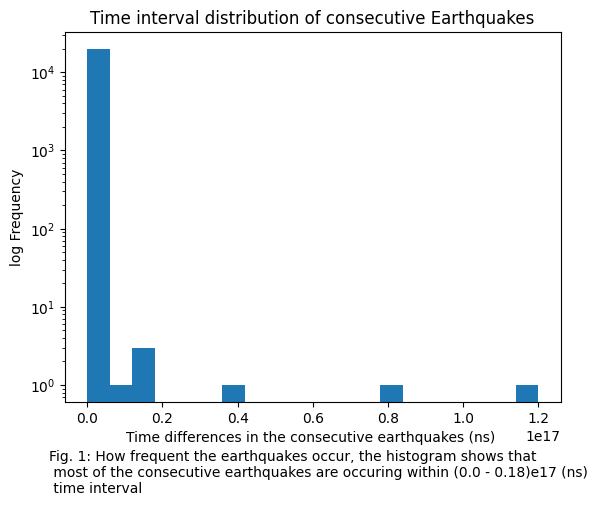

In [35]:
final_data['gaps'].plot(kind="hist", bins= 20, logy=True)
plt.xlabel('Time differences in the consecutive earthquakes (ns) ')
plt.ylabel('log Frequency')
plt.title('Time interval distribution of consecutive Earthquakes')
plt.figtext(0.1, -0.08, 'Fig. 1: How frequent the earthquakes occur, the histogram shows that \n most of the consecutive earthquakes are occuring within (0.0 - 0.18)e17 (ns)\n time interval ')

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [36]:
#assuming 30 days in a month
ns_in_month = 2.628e+15
new_final_data = final_data[final_data['gaps'] < ns_in_month].copy()

In [37]:
new_final_data

,mag,datetime,gaps
0,2.02,1984-01-01 01:30:57.520,1.443664e+13
1,2.12,1984-01-01 05:31:34.160,5.250980e+12
2,2.43,1984-01-01 06:59:05.140,1.508015e+13
3,2.07,1984-01-01 11:10:25.290,9.622330e+12
4,2.25,1984-01-01 13:50:47.620,2.085217e+13
...,...,...,...
19861,2.15,2002-12-31 06:15:19.970,1.914806e+13
19862,2.14,2002-12-31 11:34:28.030,3.753089e+13
19863,2.18,2002-12-31 21:59:58.920,2.900680e+12
19864,2.70,2002-12-31 22:48:19.600,1.562520e+12


Text(0.1, -0.08, 'Fig. 2: How frequent the earthquakes occur, after removing the gaps we do see consecutive timebins ')

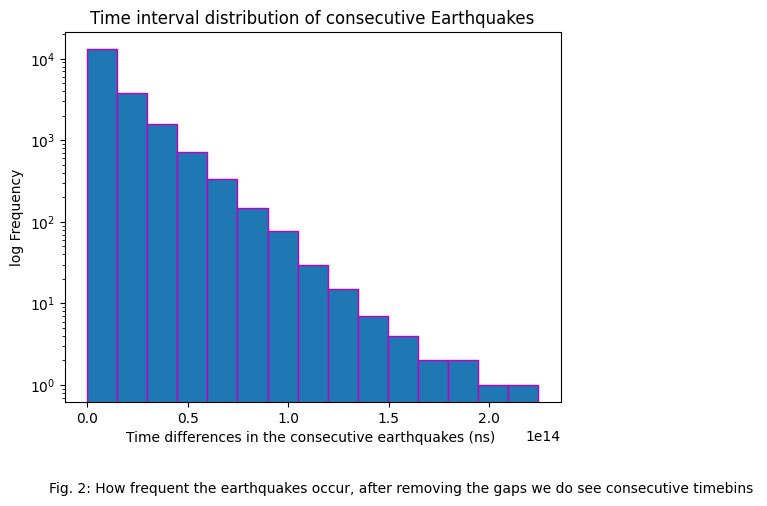

In [38]:
new_final_data['gaps'].plot(kind="hist", bins= 15, edgecolor = 'm', logy=True)
plt.xlabel('Time differences in the consecutive earthquakes (ns) ')
plt.ylabel('log Frequency')
plt.title('Time interval distribution of consecutive Earthquakes')
plt.figtext(0.1, -0.08, 'Fig. 2: How frequent the earthquakes occur, after removing the gaps we do see consecutive timebins ')

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_pseudocode.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

# for 3- 𝜎 (99.7%) the p value defined is 0.003
# Magnitudes threshold = 2,2.5,3,3.5,4

In [39]:

#Define a function to get rid of data less than magnitude threshold
def magnitude_filter(Mk, new_final_data):
  new_data = new_final_data[new_final_data['mag'] >= Mk].copy()
  #new_data = new_data.reset_index(drop=True)
  return new_data

In [40]:
Mk1= magnitude_filter(2,new_final_data)
Mk2= magnitude_filter(2.5,new_final_data)
Mk3= magnitude_filter(3,new_final_data)
Mk4= magnitude_filter(3.5,new_final_data)
Mk5= magnitude_filter(4,new_final_data)
# all these are the datasets for earthquae magnitudes for mag>2 till 4 so the number of datasets row will decrease when we reach magnitude 4
print(Mk1.max(),
  Mk2.max(),
  Mk3.max(),
  Mk4.max(),
  Mk5.max(),
  Mk1.min(),
  Mk2.min(),
  Mk3.min(),
  Mk4.min(),
  Mk5.min())

mag                                5.8
datetime    2002-12-31 23:14:22.120000
gaps                 224426810000000.0
dtype: object mag                                5.8
datetime    2002-12-31 23:14:22.120000
gaps                 163837280000000.0
dtype: object mag                                5.8
datetime    2002-12-29 19:36:07.230000
gaps            137671489999999.984375
dtype: object mag                                5.8
datetime    2002-12-12 21:03:43.200000
gaps                  97253610000000.0
dtype: object mag                                5.8
datetime    2002-12-12 21:03:43.200000
gaps                  95543440000000.0
dtype: object mag                                2.0
datetime    1984-01-01 01:30:57.520000
gaps                               0.0
dtype: object mag                                2.5
datetime    1984-01-02 00:51:32.630000
gaps                               0.0
dtype: object mag                                3.0
datetime    1984-01-02 00:51:32.630000
gaps 

In [41]:
Mk1

,mag,datetime,gaps
0,2.02,1984-01-01 01:30:57.520,1.443664e+13
1,2.12,1984-01-01 05:31:34.160,5.250980e+12
2,2.43,1984-01-01 06:59:05.140,1.508015e+13
3,2.07,1984-01-01 11:10:25.290,9.622330e+12
4,2.25,1984-01-01 13:50:47.620,2.085217e+13
...,...,...,...
19861,2.15,2002-12-31 06:15:19.970,1.914806e+13
19862,2.14,2002-12-31 11:34:28.030,3.753089e+13
19863,2.18,2002-12-31 21:59:58.920,2.900680e+12
19864,2.70,2002-12-31 22:48:19.600,1.562520e+12


## remove gaps with minimum gap threshold
threshold = [0.01]

# Work with willow

In [42]:
def rescale(x_M,m):
  for i in range(2):
    R = 1 / x_M.mean()
    x_M = R* x_M
    x_M = x_M[x_M>m]
  return x_M

In [43]:
ks1= rescale(Mk1['gaps'],0.01)
ks2 = rescale(Mk2['gaps'],0.01)
ks3 = rescale(Mk3['gaps'],0.01)
ks4 = rescale(Mk4['gaps'],0.01)
ks5 = rescale(Mk5['gaps'],0.01)
ks1

0        0.933489
1        0.339534
2        0.975099
3        0.622190
4        1.348324
           ...   
19860    0.094400
19861    1.238134
19862    2.426788
19863    0.187561
19864    0.101034
Name: gaps, Length: 18916, dtype: float64

In [44]:
ks01= rescale(Mk1['gaps'],0.001)
ks02 = rescale(Mk2['gaps'],0.001)
ks03 = rescale(Mk3['gaps'],0.001)
ks04 = rescale(Mk4['gaps'],0.001)
ks05 = rescale(Mk5['gaps'],0.001)

In [45]:
set_1 = [ks1, ks2, ks3, ks4, ks5] # for 0.01
set_2 = [ks01, ks02, ks03, ks04, ks05] #for 0.001
result1 = []
result2 = []
for i in range(5):
  for j in range(5):
    d , p =sp.stats.ks_2samp(set_1[i], set_1[j])
    d0, p0 =sp.stats.ks_2samp(set_2[i], set_2[j])
    print("for 0.01: d" ,i,j)
    print(d,p)
    print("for 0.001: d",i,j)
    print(d0, p0)
#perform KS test

for 0.01: d 0 0
0.0 1.0
for 0.001: d 0 0
0.0 1.0
for 0.01: d 0 1
0.029728708031148215 0.0008887803129993691
for 0.001: d 0 1
0.03588796375483305 1.4460909355151786e-05
for 0.01: d 0 2
0.08469589061391186 9.230607354289049e-09
for 0.001: d 0 2
0.10088057597595734 3.783107369869364e-13
for 0.01: d 0 3
0.169838755704833 1.242600034529943e-10
for 0.001: d 0 3
0.17888580607192453 1.357448028502603e-12
for 0.01: d 0 4
0.31213982738369184 1.0316572179563031e-10
for 0.001: d 0 4
0.2867583668185059 4.398786949969212e-09
for 0.01: d 1 0
0.029728708031148215 0.0008887803129993691
for 0.001: d 1 0
0.03588796375483305 1.4460909355151786e-05
for 0.01: d 1 1
0.0 1.0
for 0.001: d 1 1
0.0 1.0
for 0.01: d 1 2
0.05826597262116571 0.000809116039174085
for 0.001: d 1 2
0.06663318826023881 3.4831517707828984e-05
for 0.01: d 1 3
0.1440302503471084 2.0443556054278116e-07
for 0.001: d 1 3
0.14584871538895786 4.036218775643171e-08
for 0.01: d 1 4
0.286336701907208 5.970598469434526e-09
for 0.001: d 1 4
0.254990

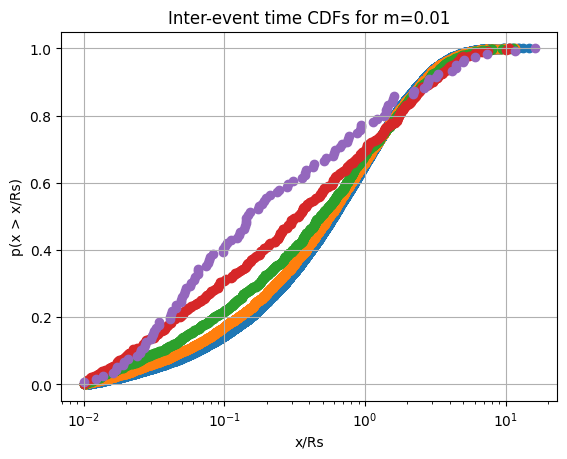

In [46]:
cdfs01 = [ks1,ks2,ks3,ks4,ks5]
magnitudes = [2.0, 2.5, 3.0, 3.5, 4.0]
for i in range(len(cdfs01)):
  sort1 = np.sort(cdfs01[i])
  cdf1 = np.arange(1, len(sort1) + 1) / len(sort1)
  magnitude_label = f'Magnitude >= {magnitudes[i]}'
  plt.scatter(sort1, cdf1, label = magnitude_label)
  plt.xscale('log')
plt.xlabel("x/Rs")
plt.ylabel("p(x > x/Rs)")
plt.title("Inter-event time CDFs for m=0.01")
plt.grid()
plt.show()

# Fig 3.
## CDFs for the time gaps for threshold greater than 0.01, which is more spread out as compared to the Corral paper graph, probably due to the change of data (this one is plotted using the raw data extracted from the site).

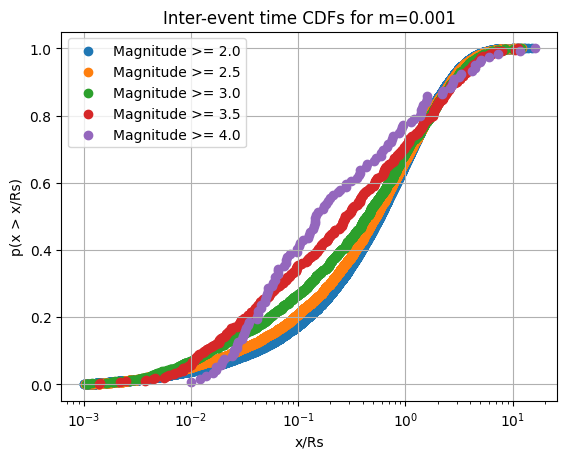

In [47]:
cdfs001 = [ks01,ks02,ks03,ks04,ks05]
magnitudes = [2.0, 2.5, 3.0, 3.5, 4.0]
for i in range(len(cdfs001)):
  sort01 = np.sort(cdfs001[i])
  cdf01 = np.arange(1, len(sort01) + 1) / len(sort01)
  magnitude_label = f'Magnitude >= {magnitudes[i]}'
  plt.scatter(sort01, cdf01, label=magnitude_label)
  plt.xscale('log')
plt.xlabel("x/Rs")
plt.ylabel("p(x > x/Rs)")
plt.title("Inter-event time CDFs for m=0.001")
plt.grid()
plt.legend()
plt.show()

# Fig 4.
## CDFs for the time gaps for threshold greater than 0.001, which has strange behaviour more distance for magnitude >=4 (purple) and others as well, probably due to the change of data (this one is plotted using the raw data extracted from the site).

(array([1.39302126, 0.51740789, 0.393031  , 0.22139088, 0.17661519,
        0.1442772 , 0.13183951, 0.09452644, 0.0920389 , 0.05472584,
        0.07711368, 0.04477568, 0.04975076, 0.02985046, 0.01741277,
        0.02487538, 0.01243769, 0.0199003 , 0.00497508, 0.00248754,
        0.0199003 , 0.01243769, 0.        , 0.00497508, 0.00497508,
        0.        , 0.00248754, 0.00497508, 0.00497508, 0.        ,
        0.        , 0.        , 0.        , 0.00248754, 0.        ,
        0.        , 0.        , 0.        , 0.00248754, 0.00248754]),
 array([1.00736392e-02, 2.90606728e-01, 5.71139817e-01, 8.51672906e-01,
        1.13220599e+00, 1.41273908e+00, 1.69327217e+00, 1.97380526e+00,
        2.25433835e+00, 2.53487144e+00, 2.81540453e+00, 3.09593762e+00,
        3.37647070e+00, 3.65700379e+00, 3.93753688e+00, 4.21806997e+00,
        4.49860306e+00, 4.77913615e+00, 5.05966924e+00, 5.34020233e+00,
        5.62073541e+00, 5.90126850e+00, 6.18180159e+00, 6.46233468e+00,
        6.74286777e+00

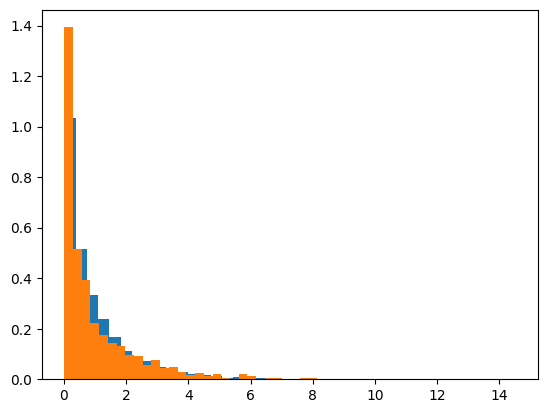

In [48]:
plt.hist(ks1 , bins=40, density=True)
plt.hist(ks3, bins=40, density=True)

# Fig 5.
## Histogram just to check the distributions of final cleaned up gap data

# Table for 0.01

| m = 0.01 | N | M ≥ 2.0 | M ≥ 2.5 | M ≥ 3.0 | M ≥ 3.5 | M ≥ 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M ≥ 2.0 | 18994 | - | 0.89% | 5.9e-7% | 1.2e-8% | 1.03e-8% |
|M ≥ 2.5 | 5790 | 0.0297 | - | 0.88% | 2.04e-5% | 5.9e-7% |
|M ≥ 3.0 | 1507 | 0.0846 | 0.0583 | - | 0.4% | 1.2e-3% |
|M ≥ 3.5 | 438 | 0.1698 | 0.144 | 0.0972 | - | 2.8% |
|M ≥ 4.0 | 117 | 0.3122 | 0.2863 | 0.231 | 0.1492 | - |

#Table no. 1:
## This table has the ks test result for m = 0.01, bottom off diagonal values corresponds to statistic and top off diagonal are percentages for p values (which in my case are really messed up) -> reasons -> unknown for now.

# Table for 0.001

| m = 0.001 | N | M ≥ 2.0 | M ≥ 2.5 | M ≥ 3.0 | M ≥ 3.5 | M ≥ 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M ≥ 2.0 | 18994 | - | 1.45e-3% | 3.8e-10% | 1.36e-10% | 1.03e-8% |
|M ≥ 2.5 | 5790 |  0.0358| - | 3.4e-3% | 4e-6% | 3.56e-5% |
|M ≥ 3.0 | 1507 | 0.0846 | 0.066 | - | 0.6% | 0.042% |
|M ≥ 3.5 | 438 | 0.1788 | 0.1458 | 0.0908 | - | 13.9% |
|M ≥ 4.0 | 117 | 0.312 | 0.255 | 0.195 | 0.1171 | - |

#Table no. 2:
## This table has the ks test result for m = 0.001, bottom off diagonal values corresponds to statistic and top off diagonal are percentages for p values (which, again, in my case are really messed up) -> reasons -> unknown for now.

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

* My result is not identical to Correll's 2018 as my p-values are way too low which leads to null hypothesis rejection as opposed to the results in the paper.
* The main reason i understand is some problem, maybe in formatting my data.
* So in my case, the two samples are not drawn from the same distributions.

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

* Changing the alpha threshold can lead to data mining, where researchers selectively report results that appear statistically significant but are, in fact, due to random chance. This practice can increase the rate of false positives.